In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('bank_sliced.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T20002,C3511547,18/4/98,F,DELHI,7267.76,23/9/16,193515,100.00
1,T20003,C1340791,29/9/87,F,KOTTAYAM,4971.10,23/9/16,193518,251.00
2,T20004,C4726327,15/10/91,F,TONK,4.36,23/9/16,193520,200.00
3,T20005,C3612791,17/4/72,F,MUMBAI,83461.73,23/9/16,192618,975.04
4,T20006,C3935459,12/11/86,F,NOIDA,4184.27,23/9/16,194556,58.00


In [33]:
df.shape

(5000, 9)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            5000 non-null   object 
 1   CustomerID               5000 non-null   object 
 2   CustomerDOB              4969 non-null   object 
 3   CustGender               4992 non-null   object 
 4   CustLocation             5000 non-null   object 
 5   CustAccountBalance       4998 non-null   float64
 6   TransactionDate          5000 non-null   object 
 7   TransactionTime          5000 non-null   int64  
 8   TransactionAmount (INR)  5000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 351.7+ KB


In [35]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,4.998000e+03,5000.000000,5000.000000
mean,1.238004e+05,165805.047800,1538.065068
std,5.816404e+05,39290.942032,5522.937391
min,0.000000e+00,10.000000,0.000000
25%,5.353800e+03,134312.500000,165.000000
50%,1.935189e+04,175404.500000,423.000000
75%,6.371231e+04,195002.750000,1148.250000
max,1.725078e+07,232447.000000,170000.000000


In [36]:
df.isna().sum()

TransactionID               0
CustomerID                  0
CustomerDOB                31
CustGender                  8
CustLocation                0
CustAccountBalance          2
TransactionDate             0
TransactionTime             0
TransactionAmount (INR)     0
dtype: int64

In [37]:
# Display Null Column Data
df_DOB_null = pd.isnull(df['CustomerDOB'])
# df_Gender_null = pd.isnull(df['CustGender'])
df[df_DOB_null][:5]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
170,T20172,C1539187,NaN,M,PATIALA,32598.06,23/9/16,194559,612.65
345,T20347,C4621849,NaN,M,LUCKNOW,38823.95,23/9/16,193308,1265.00
351,T20353,C7618857,NaN,M,MOHALI,222501.99,23/9/16,211043,1633.00
470,T20472,C7030841,NaN,M,BANGALORE,174.81,23/9/16,203649,656.20
617,T20619,C4227151,NaN,M,DELHI,296460.54,23/9/16,195319,1000.00


In [38]:
df_len = len(df.values)
df = df.dropna()
df_len_cleaned = len(df.values)
data_removed = df_len - df_len_cleaned
print('Initial length : ',df_len, '\nLength after cleaning : ',df_len_cleaned, ' (',str(data_removed), ' rows removed )')

Initial length :  5000 
Length after cleaning :  4960  ( 40  rows removed )


In [39]:
# Check existing missing values
df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [40]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T20002,C3511547,18/4/98,F,DELHI,7267.76,23/9/16,193515,100.00
1,T20003,C1340791,29/9/87,F,KOTTAYAM,4971.10,23/9/16,193518,251.00
2,T20004,C4726327,15/10/91,F,TONK,4.36,23/9/16,193520,200.00
3,T20005,C3612791,17/4/72,F,MUMBAI,83461.73,23/9/16,192618,975.04
4,T20006,C3935459,12/11/86,F,NOIDA,4184.27,23/9/16,194556,58.00
...,...,...,...,...,...,...,...,...,...
4995,T24997,C4820781,21/11/80,M,BANGALORE,30742.49,27/9/16,161733,214.00
4996,T24998,C7515790,22/2/85,M,GURGAON,17687.06,27/9/16,161129,125.00
4997,T24999,C8218573,2/5/91,F,RAIGAD,600.41,27/9/16,161212,353.00
4998,T25000,C1531449,29/4/90,F,LUCKNOW,673.98,22/9/16,91400,16.72


In [41]:
df['CustomerDOB'].value_counts()

1/1/1800    308
1/1/89        9
1/1/91        7
7/2/80        7
1/1/88        6
           ... 
31/8/93       1
12/7/74       1
24/6/83       1
17/11/94      1
12/5/70       1
Name: CustomerDOB, Length: 3343, dtype: int64

In [42]:
df = df[df['CustomerDOB'] != '1/1/1800']
df['CustomerDOB'].value_counts()

1/1/89     9
1/1/91     7
7/2/80     7
1/1/88     6
1/1/92     6
          ..
15/8/65    1
2/4/70     1
18/3/86    1
2/8/86     1
12/5/70    1
Name: CustomerDOB, Length: 3342, dtype: int64

In [43]:
len(df.values)

4652

In [44]:
# Fix date formatting 
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29968\1439252348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29968\1439252348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T20002,C3511547,1998-04-18,F,DELHI,7267.76,2016-09-23,193515,100.00
1,T20003,C1340791,1987-09-29,F,KOTTAYAM,4971.10,2016-09-23,193518,251.00
2,T20004,C4726327,1991-10-15,F,TONK,4.36,2016-09-23,193520,200.00
3,T20005,C3612791,1972-04-17,F,MUMBAI,83461.73,2016-09-23,192618,975.04
4,T20006,C3935459,1986-12-11,F,NOIDA,4184.27,2016-09-23,194556,58.00


In [45]:
df['TransactionDate'].value_counts()

2016-09-23    2923
2016-09-26     780
2016-09-27     649
2016-09-22     300
Name: TransactionDate, dtype: int64

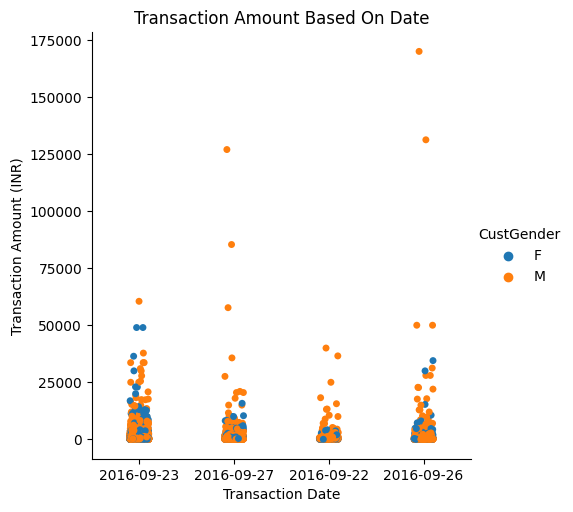

In [46]:
# Visualizing Transaction Amount & Transaction Date correlation
sns.catplot(data = df, y = 'TransactionAmount (INR)', x = 'TransactionDate', hue = 'CustGender')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount (INR)')
plt.title('Transaction Amount Based On Date')
plt.show()

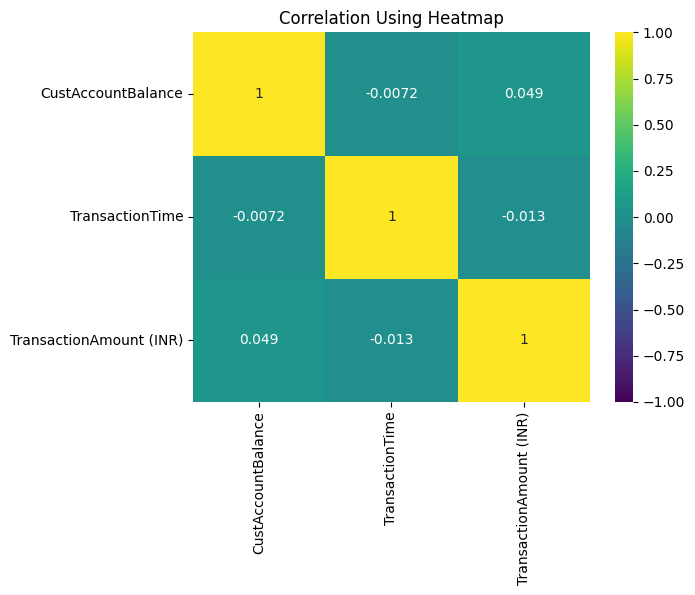

In [47]:
# Finding correlation between data columns
sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)
plt.title('Correlation Using Heatmap')
plt.show()

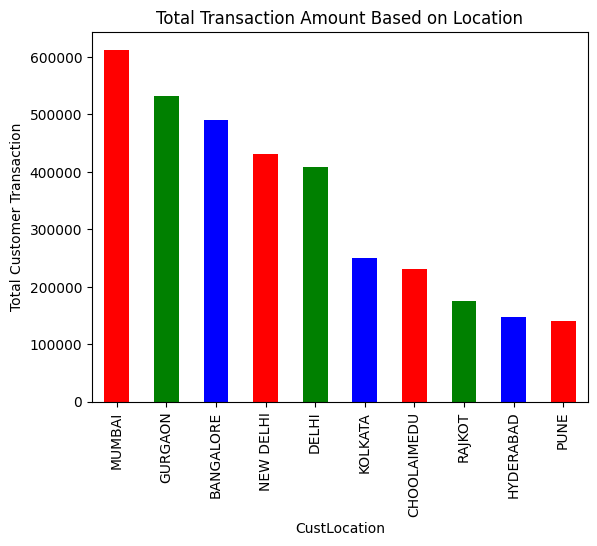

In [48]:
# Highest transaction amount based on location
# df['CustLocation'].value_counts(ascending = False)
df_cust_location = df.groupby('CustLocation')['TransactionAmount (INR)'].sum().sort_values(ascending = False)[:10]
df_cust_location.plot(kind= 'bar', color = ['r','g','b'])
plt.ylabel('Total Customer Transaction')
plt.title('Total Transaction Amount Based on Location')
plt.show()

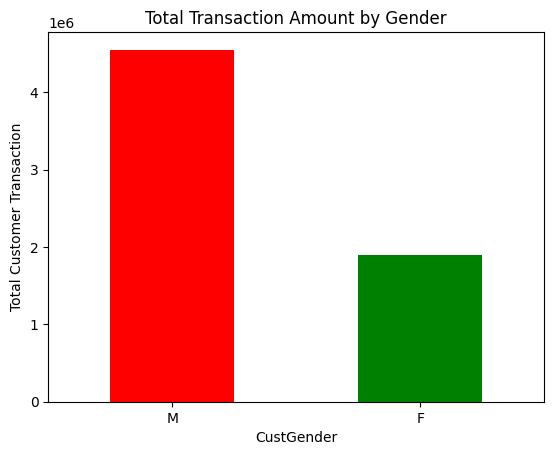

In [49]:
df_cust_gender_location = df.groupby('CustGender')['TransactionAmount (INR)'].sum().sort_values(ascending = False)
df_cust_gender_location.plot(kind= 'bar', color = ['r','g'])
plt.ylabel('Total Customer Transaction')
plt.title('Total Transaction Amount by Gender')
plt.xticks(rotation = 360)
plt.show()

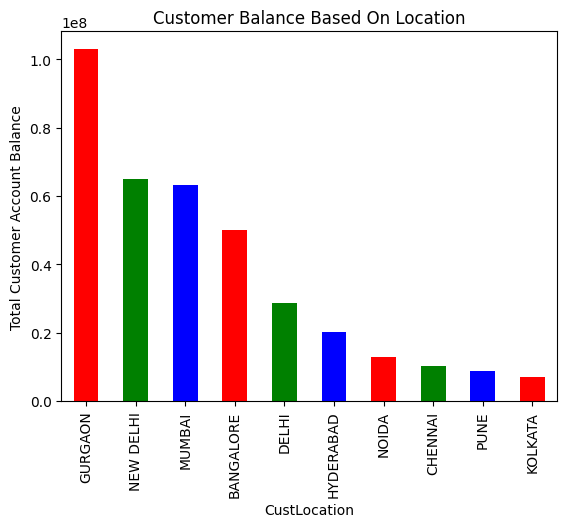

In [50]:
# Highest Customer Account Balance based on Location
df_cust_bal = df.groupby('CustLocation')['CustAccountBalance'].sum().sort_values(ascending = False)[:10]
df_cust_bal.plot(kind= 'bar', color = ['r','g','b'])
plt.ylabel('Total Customer Account Balance')
plt.title('Customer Balance Based On Location')
plt.show()

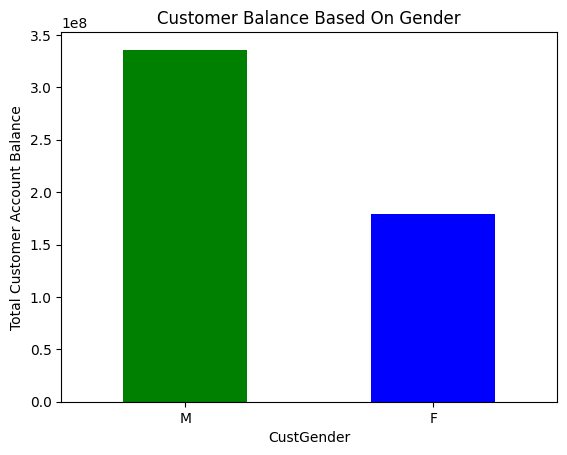

In [51]:
# Highest Customer Account Balance based on Location
df_cust_gender_bal = df.groupby('CustGender')['CustAccountBalance'].sum().sort_values(ascending = False)
# df_cust_gender_bal
df_cust_gender_bal.plot(kind= 'bar', color = ['g','b'])
plt.ylabel('Total Customer Account Balance')
plt.title('Customer Balance Based On Gender')
plt.xticks(rotation = 360)
plt.show()

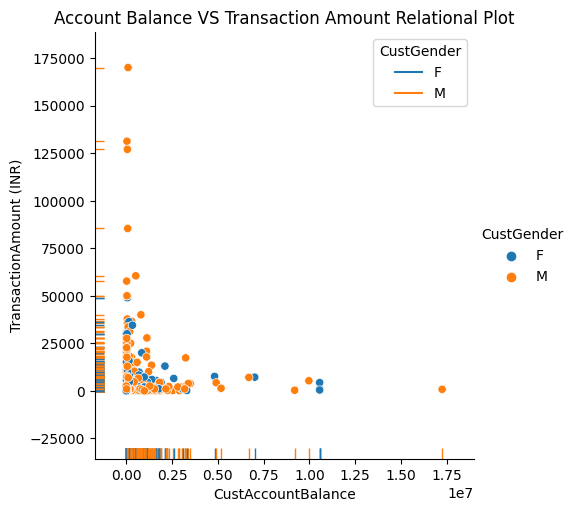

In [52]:
sns.relplot(data = df, x = 'CustAccountBalance', y = 'TransactionAmount (INR)', hue = 'CustGender')
sns.rugplot(data = df, x = 'CustAccountBalance', y = 'TransactionAmount (INR)', hue = 'CustGender')
plt.title('Account Balance VS Transaction Amount Relational Plot')
plt.show()